# Fraction of flagged tracks per cell analysis



## Nocodazole Treatment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np


In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
no_drug_df = load_and_label(csv_files_1, '- Noco')
noco_30mins_df = load_and_label(csv_files_2, '+ Noco, 30 mins')
noco_60mins_df = load_and_label(csv_files_3, '+ Noco, 60 mins')

results_df = pd.concat([no_drug_df, noco_30mins_df, noco_60mins_df], ignore_index=True)



In [5]:
desired_order = ['- Noco', '+ Noco, 30 mins', '+ Noco, 60 mins']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- Noco v.s. + Noco, 30 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.317e-03 stat=4.020e+00
+ Noco, 30 mins v.s. + Noco, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-2.949e-01
- Noco v.s. + Noco, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.455e-03 stat=3.976e+00


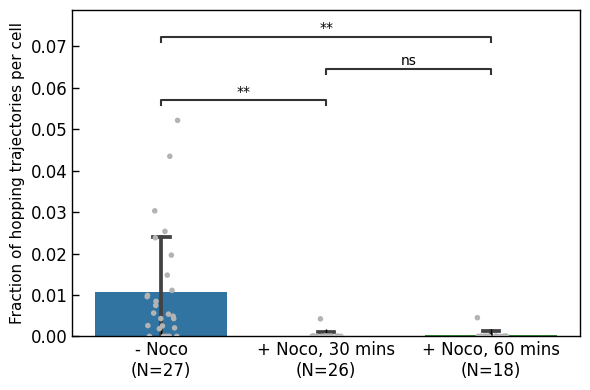

In [7]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- Noco", "+ Noco, 30 mins"), 
    ("- Noco", "+ Noco, 60 mins"), 
    ("+ Noco, 30 mins", "+ Noco, 60 mins")
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of hopping trajectories per cell", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## Latrunculin A Treatment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
no_drug_df = load_and_label(csv_files_1, '- LatA')
noco_30mins_df = load_and_label(csv_files_2, '+ LatA, 30 mins')
noco_60mins_df = load_and_label(csv_files_3, '+ LatA, 60 mins')

results_df = pd.concat([no_drug_df, noco_30mins_df, noco_60mins_df], ignore_index=True)

In [5]:
desired_order = ['- LatA', '+ LatA, 30 mins', '+ LatA, 60 mins']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- LatA v.s. + LatA, 30 mins: Welch's t-test independent samples with Bonferroni correction, P_val=8.282e-01 stat=1.106e+00
+ LatA, 30 mins v.s. + LatA, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=4.306e-01 stat=-1.531e+00
- LatA v.s. + LatA, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.243e-01


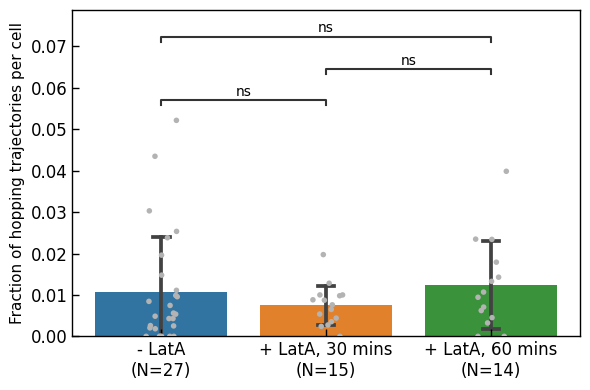

In [6]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- LatA", "+ LatA, 30 mins"), 
    ("- LatA", "+ LatA, 60 mins"), 
    ("+ LatA, 30 mins", "+ LatA, 60 mins")
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of hopping trajectories per cell", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## Fraction bar plot : PB vs HOPS

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np

In [8]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for PB",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for HOPS",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [9]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [10]:
PB = load_and_label(csv_files_1, 'PB')
HOPS = load_and_label(csv_files_2, 'HOPS')

results_df = pd.concat([PB, HOPS], ignore_index=True)

In [11]:
desired_order = ['PB', 'HOPS']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PB v.s. HOPS: Welch's t-test independent samples with Bonferroni correction, P_val=3.171e-04 stat=4.726e+00


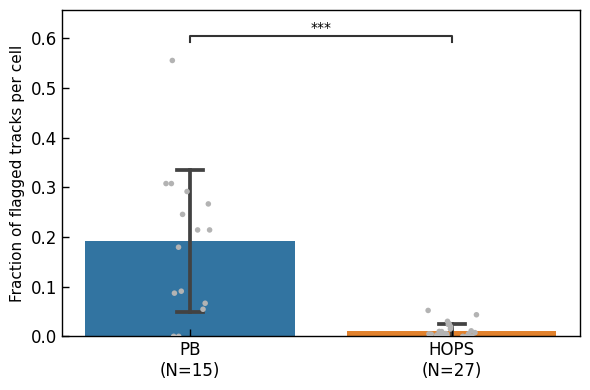

In [14]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("PB", "HOPS"), 
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of flagged tracks per cell", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## Fraction bar plot : PB vs HOPS vs Control

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np

In [2]:
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for PB",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for HOPS",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Control",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [7]:
PB = load_and_label(csv_files_1, 'PB')
HOPS = load_and_label(csv_files_2, 'HOPS')
control = load_and_label(csv_files_3, 'control')

In [8]:
results_df = pd.concat([PB, HOPS, control], ignore_index=True)
desired_order = ['PB', 'HOPS', 'control']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order[:2]}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PB v.s. HOPS: Welch's t-test independent samples with Bonferroni correction, P_val=3.708e-03 stat=4.019e+00
HOPS v.s. control: Welch's t-test independent samples with Bonferroni correction, P_val=1.125e-03 stat=4.195e+00
PB v.s. control: Welch's t-test independent samples with Bonferroni correction, P_val=1.905e-03 stat=4.375e+00


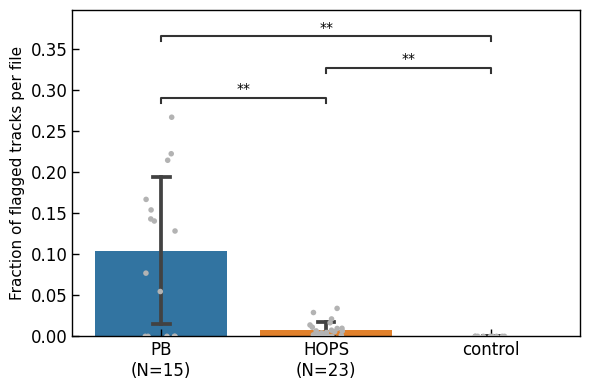

In [10]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("PB", "HOPS"),
    ("PB", "control"),
    ("HOPS", "control")
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of flagged tracks per file", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={condition_counter.get(label, '')})" for label in desired_order[:2]]
labels_with_counts.append("control")  # Add "control" without any additional label
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## Fraction bar plot : PB vs Noco_30mins vs Control

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np

In [2]:
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for HOPS",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole 30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Control",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
PB = load_and_label(csv_files_1, '- Noco')
HOPS = load_and_label(csv_files_2, '+ Noco, 30 mins')
control = load_and_label(csv_files_3, 'Control')

In [5]:
results_df = pd.concat([PB, HOPS, control], ignore_index=True)
desired_order = ['- Noco', '+ Noco, 30 mins', 'Control']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order[:2]}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- Noco v.s. + Noco, 30 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.004e-03 stat=4.128e+00
+ Noco, 30 mins v.s. Control: Welch's t-test independent samples with Bonferroni correction, P_val=nan stat=nan
- Noco v.s. Control: Welch's t-test independent samples with Bonferroni correction, P_val=1.004e-03 stat=4.128e+00


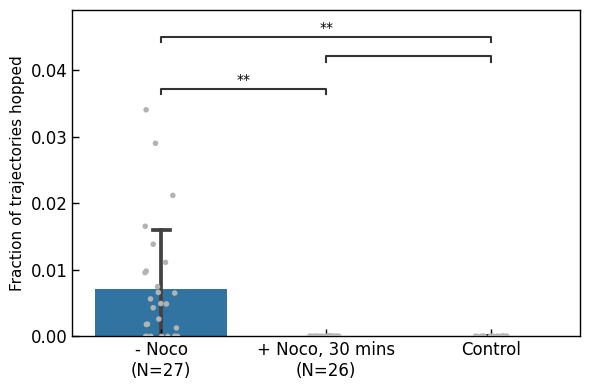

In [6]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- Noco", "+ Noco, 30 mins"),
    ("- Noco", "Control"),
    ("+ Noco, 30 mins", "Control")
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of trajectories hopped", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={condition_counter.get(label, '')})" for label in desired_order[:2]]
labels_with_counts.append("Control")  # Add "control" without any additional label
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## Fraction barplot of hopping : HOPS vs LatA_30 mins vs Control

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np

In [8]:
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for HOPS",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA 30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Control",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [9]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [10]:
PB = load_and_label(csv_files_1, '- LatA')
HOPS = load_and_label(csv_files_2, '+ LatA, 30 mins')
control = load_and_label(csv_files_3, 'Control')

In [11]:
results_df = pd.concat([PB, HOPS, control], ignore_index=True)
desired_order = ['- LatA', '+ LatA, 30 mins', 'Control']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order[:2]}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- LatA v.s. + LatA, 30 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=7.165e-01
+ LatA, 30 mins v.s. Control: Welch's t-test independent samples with Bonferroni correction, P_val=8.761e-03 stat=3.548e+00
- LatA v.s. Control: Welch's t-test independent samples with Bonferroni correction, P_val=1.004e-03 stat=4.128e+00


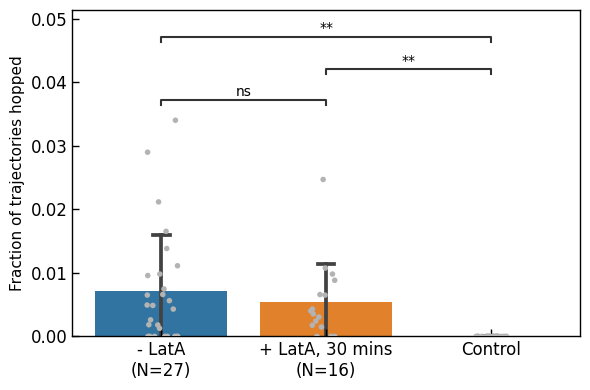

In [12]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- LatA", "+ LatA, 30 mins"),
    ("- LatA", "Control"),
    ("+ LatA, 30 mins", "Control")
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of trajectories hopped", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={condition_counter.get(label, '')})" for label in desired_order[:2]]
labels_with_counts.append("Control")  # Add "control" without any additional label
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## Only two conditions

## HOPS vs Nocodazole treatment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for - Noco",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for + Noco, 30mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
without_noco = load_and_label(csv_files_1, '- Noco')
with_noco = load_and_label(csv_files_2, '+ Noco')

results_df = pd.concat([without_noco, with_noco], ignore_index=True)

In [5]:
desired_order = ['- Noco', '+ Noco']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- Noco v.s. + Noco: Welch's t-test independent samples with Bonferroni correction, P_val=4.389e-04 stat=4.020e+00


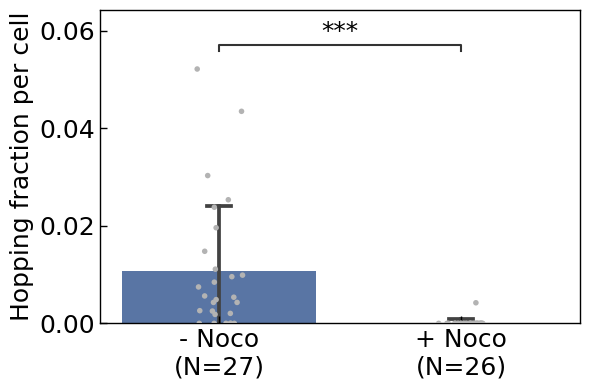

In [6]:
# Plotting
plt.figure(figsize=(6, 4))

# Define the custom colors
custom_palette = {
    "- Noco": "#4C72B0",      # Standard blue
    "+ Noco": "#BAB86C" 
}

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order, palette=custom_palette)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- Noco", "+ Noco"), 
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order,fontsize=18)

# Customize axis labels and layout
plt.ylabel("Hopping fraction per cell", fontsize=18)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=18)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_hopped_plot_Noco.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## HOPS vs Latrunculin A treatment

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np
import matplotlib

In [8]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for - LatA",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for + LatA, 30mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [9]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [10]:
without_latA = load_and_label(csv_files_1, '- LatA')
with_latA = load_and_label(csv_files_2, '+ LatA')

results_df = pd.concat([without_latA, with_latA], ignore_index=True)

In [11]:
desired_order = ['- LatA', '+ LatA']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- LatA v.s. + LatA: Welch's t-test independent samples with Bonferroni correction, P_val=2.761e-01 stat=1.106e+00


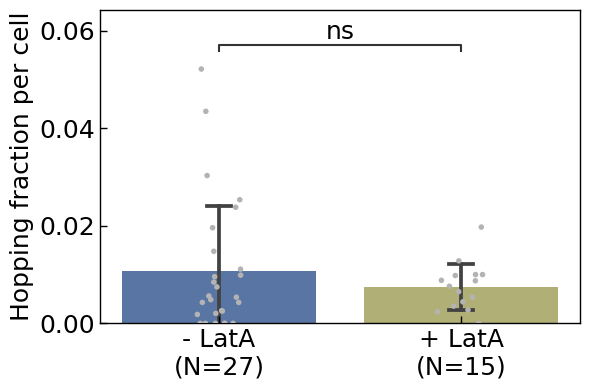

In [12]:
# Plotting
plt.figure(figsize=(6, 4))

# Define the custom colors
custom_palette = {
    "- LatA": "#4C72B0",      # Standard blue
    "+ LatA": "#BAB86C"  
}

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order, palette=custom_palette)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- LatA", "+ LatA"), 
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order, fontsize=18)

# Customize axis labels and layout
plt.ylabel("Hopping fraction per cell", fontsize=18)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=18)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_hopped_plot_LatA.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

##Fraction bar plot with ER stress and without ER stress

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np
import matplotlib

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for - Stress",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for + Stress, 30mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
without_latA = load_and_label(csv_files_1, '- Stress')
with_latA = load_and_label(csv_files_2, '+ Stress')

results_df = pd.concat([without_latA, with_latA], ignore_index=True)

In [5]:
desired_order = ['- Stress', '+ Stress']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- Stress v.s. + Stress: Welch's t-test independent samples with Bonferroni correction, P_val=5.693e-03 stat=3.192e+00


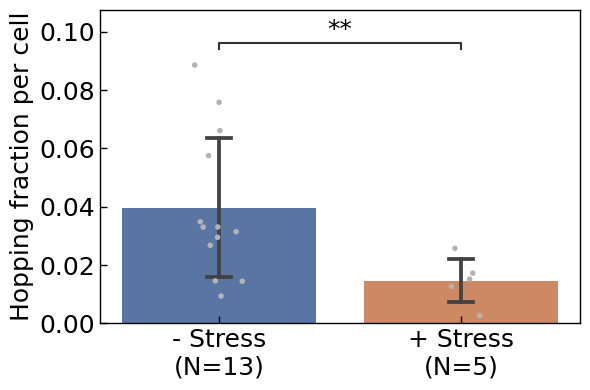

In [6]:
# Plotting
plt.figure(figsize=(6, 4))

# Define the custom colors
custom_palette = {
    "- Stress": "#4C72B0",      # Standard blue
    "+ Stress": "#DD8452"  
}

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order, palette=custom_palette)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- Stress", "+ Stress"), 
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order, fontsize=18)

# Customize axis labels and layout
plt.ylabel("Hopping fraction per cell", fontsize=18)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=18)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_hopped_plot_ER_stress.png", format="png", bbox_inches="tight", dpi=300)
plt.show()